In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install yfinance pandas transformers torch feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=0ecaa5c352e68b9a98e9ebade2198892781abe5a44d318b30985c8b529b29575
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [5]:
df = pd.read_csv("/content/drive/MyDrive/CEV/updated_stock_sentiment_analysis_123.csv")

In [ ]:
df

In [7]:
df=df.drop(columns=["Date","Sentiment","Headlines_Count","News_Article"], axis=1,errors='ignore')

In [8]:
def calculate_feature_target_correlation(dataframe, target_column):

    # Identify numeric columns (exclude target)
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    numeric_columns = [col for col in numeric_columns if col != target_column]

    # Calculate correlations
    correlations = {}

    # Pearson correlation for continuous variables
    pearson_corr = dataframe[numeric_columns + [target_column]].corr()[target_column][numeric_columns]

    # Spearman correlation for potential non-linear relationships
    spearman_corr = dataframe[numeric_columns + [target_column]].corr(method='spearman')[target_column][numeric_columns]

    # Store correlations
    correlations['Pearson'] = pearson_corr
    correlations['Spearman'] = spearman_corr

    return correlations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

def visualize_feature_correlations(correlations, title='Feature-Target Correlations'):
    # Prepare data for plotting
    pearson_corr = correlations['Pearson']
    spearman_corr = correlations['Spearman']

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Pearson Correlation Plot
    pearson_corr.sort_values(ascending=False).plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
    ax1.set_title('Pearson Correlation with Target Variable')
    ax1.set_xlabel('Features')
    ax1.set_ylabel('Correlation Coefficient')
    ax1.axhline(y=0, color='r', linestyle='--')

    # Spearman Correlation Plot
    spearman_corr.sort_values(ascending=False).plot(kind='bar', ax=ax2, color='green', alpha=0.7)
    ax2.set_title('Spearman Correlation with Target Variable')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Correlation Coefficient')
    ax2.axhline(y=0, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

    return fig

In [10]:
import seaborn as sns
def advanced_correlation_analysis(dataframe, target_column):

    # Calculate correlations
    correlations = calculate_feature_target_correlation(dataframe, target_column)

    # Visualize correlations
    visualize_feature_correlations(correlations)

    # Prepare comprehensive correlation report
    correlation_report = pd.DataFrame({
        'Pearson Correlation': correlations['Pearson'],
        'Spearman Correlation': correlations['Spearman'],
    })

    # Print top correlations
    print("\nFeatures by Correlation Strength:")
    print(correlation_report)


    return correlation_report

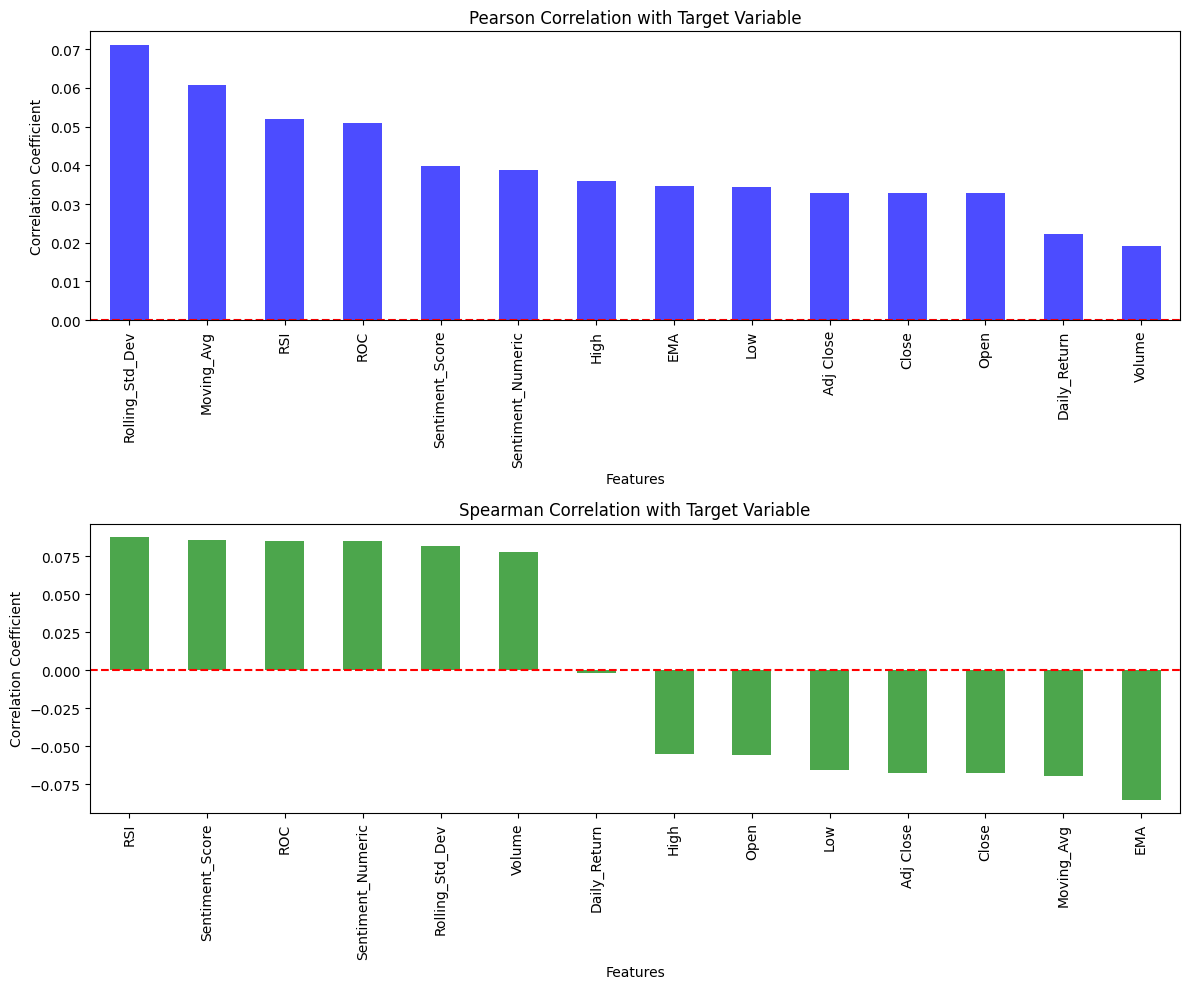


Features by Correlation Strength:
                   Pearson Correlation  Spearman Correlation
Adj Close                     0.032942             -0.067391
Close                         0.032942             -0.067391
High                          0.035968             -0.054902
Low                           0.034491             -0.065938
Open                          0.032742             -0.055694
Volume                        0.019198              0.078068
Daily_Return                  0.022368             -0.001813
Sentiment_Score               0.039712              0.085447
Moving_Avg                    0.060836             -0.069525
Rolling_Std_Dev               0.071043              0.081925
RSI                           0.052046              0.087732
EMA                           0.034650             -0.085190
ROC                           0.051047              0.085251
Sentiment_Numeric             0.038709              0.085117


In [11]:
correlation_results = advanced_correlation_analysis(df, 'Next_Day_Return')

In [12]:
y=df['Next_Day_Return']

In [13]:
X = df.drop(columns=['Next_Day_Return'], axis=1, errors='ignore')

In [14]:
X


,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Sentiment_Score,Moving_Avg,Rolling_Std_Dev,RSI,EMA,ROC,Sentiment_Numeric
0,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,0.653489,-0.4,222.259628,12.181656,53.344499,108.099998,5.018840,0.0
1,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,0.051249,0.0,222.259628,12.181656,53.344499,108.838665,5.018840,0.5
2,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,-0.029039,0.0,222.259628,12.181656,53.344499,109.038843,5.018840,0.5
3,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,0.024651,0.0,222.259628,12.181656,53.344499,109.574997,5.018840,0.5
4,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,0.059349,-0.2,222.259628,12.181656,53.344499,110.934330,5.018840,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,430.600006,430.600006,434.510010,415.410004,431.000000,72698100,0.022657,0.2,418.382856,34.073056,68.841618,416.783801,22.531441,1.0
497,462.279999,462.279999,462.779999,435.140015,435.899994,59551800,0.073572,0.2,425.836428,31.116754,72.174769,422.849961,29.153747,1.0
498,454.130005,454.130005,465.329987,451.019989,465.160004,76366400,-0.017630,-0.2,431.882143,27.317474,68.250827,427.020633,22.907255,0.0
499,431.660004,431.660004,450.000000,426.500000,449.519989,82666800,-0.049479,-0.4,434.913572,24.420222,59.044415,427.639216,10.903860,0.0


In [16]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CEV/updated_stock_sentiment_analysis_123.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select the columns for imputation
columns_to_impute = ['Moving_Avg', 'Rolling_Std_Dev', 'RSI', 'ROC']

# Apply multivariate imputation using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Save the updated dataset
output_file_path = 'stock_sentiment_analysis_multivariate_imputed.csv'
data.to_csv(output_file_path, index=False)

print(f"Multivariate imputation completed, dataset saved to {output_file_path}")

Multivariate imputation completed, dataset saved to stock_sentiment_analysis_multivariate_imputed.csv


In [17]:
df1 = pd.read_csv("/content/stock_sentiment_analysis_multivariate_imputed.csv")